In [1]:
import pandas as pd

data = pd.read_csv("2020_dataset.csv")
data

,업종,브랜드,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률
0,한식,국사랑,95,29,269167,52600,17,51
1,한식,삼육가珍,66,5,1540660,100448,0,40
2,한식,전준수명품청기와감자탕,56,18,619235,115000,11,0
3,한식,남도복국,44,13,599429,104220,69,0
4,한식,두찜,56,263,240278,47000,62,11
...,...,...,...,...,...,...,...,...
2178,기타 외식,포항황소곱창,27,8,327105,74800,100,0
2179,기타 외식,김덕후의 곱창조,86,24,779384,121050,8,4
2180,기타 외식,화덕고깃간,44,5,426872,182300,40,0
2181,기타 외식,반반한족발닭발,50,5,138981,75510,40,0


In [2]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 수치형만 추출
data_num = data.drop("업종", axis=1)
data_num = data_num.drop("브랜드", axis=1)
data_num

,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률
0,95,29,269167,52600,17,51
1,66,5,1540660,100448,0,40
2,56,18,619235,115000,11,0
3,44,13,599429,104220,69,0
4,56,263,240278,47000,62,11
...,...,...,...,...,...,...
2178,27,8,327105,74800,100,0
2179,86,24,779384,121050,8,4
2180,44,5,426872,182300,40,0
2181,50,5,138981,75510,40,0


In [4]:
# 전체 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(data_num)

StandardScaler()

In [5]:
scail_data=scaler.transform(data_num)
scail_data

array([[ 0.10829852, -0.16471522, -0.14932456, -0.61118934, -0.41392291,
         1.48468447],
       [-0.33169983, -0.31877955,  4.50174846,  0.07102465, -0.96023109,
         0.98101516],
       [-0.48342339, -0.23532803,  1.13121087,  0.27850621, -0.60673756,
        -0.85050959],
       ...,
       [-0.66549167, -0.31877955,  0.42755433,  1.23806567,  0.32519991,
        -0.85050959],
       [-0.57445753, -0.31877955, -0.62554   , -0.2845399 ,  0.32519991,
        -0.85050959],
       [-0.57445753, -0.29952151, -0.26343468, -1.05988675,  2.25334641,
        -0.85050959]])

In [6]:
# k-means
from sklearn.cluster import KMeans

# 클러스터 5개 지정
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(scail_data)
y_pred

array([3, 1, 4, ..., 0, 0, 0])

In [7]:
label = kmeans.labels_
x = data_num.copy()
x["레이블"] = label
x["레이블"].value_counts()

4    1152
0     590
3     272
1     150
2      19
Name: 레이블, dtype: int64

In [8]:
# 5클래스 데이터 평균
group_data=x.groupby(['레이블'], as_index=False).mean()
group_data

,레이블,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률
0,0,38.949153,30.789831,291629.084746,74747.888136,70.884746,7.800000
1,1,91.380000,38.753333,945343.553333,259289.246667,20.373333,11.546667
2,2,309.526316,1338.315789,361352.210526,128907.631579,6.368421,4.736842
3,3,71.959559,16.676471,232369.680147,84748.536765,19.371324,65.014706
4,4,112.553819,56.751736,254142.876736,86725.763021,12.986979,14.271701


In [9]:
# 특정 레이블 값만 추출
x[x['레이블'].isin(["1"])]

,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률,레이블
1,66,5,1540660,100448,0,40,1
9,37,7,1338760,283500,42,0,1
25,44,454,992450,170940,72,0,1
39,37,9,1513090,298700,66,0,1
49,255,1,623671,240780,0,0,1
...,...,...,...,...,...,...,...
2131,35,7,842323,159300,57,0,1
2139,33,9,1446589,235250,55,0,1
2141,54,5,726371,306900,20,0,1
2146,108,9,1075136,329150,33,22,1


In [10]:
# 차원 축소(주성분)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(scail_data)
X2D[:5]

array([[-0.10040588, -0.95281078],
       [ 1.63881043,  2.49493574],
       [ 0.42827174,  1.13036266],
       [-0.72392609,  1.64281497],
       [-0.70209908, -0.21420614]])

In [11]:
pca.explained_variance_ratio_

array([0.2956566 , 0.26268361])

C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


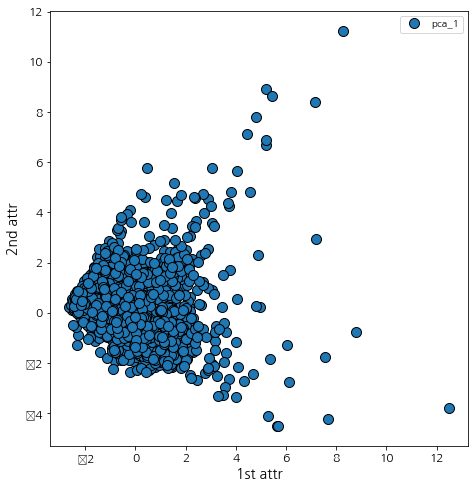

In [12]:
# 두개의 주성분을 그래프로 나타내자.
import mglearn

plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X2D[:,0],X2D[:,1])

plt.legend(["pca_1","pca_2"],loc="best")

plt.gca().set_aspect("equal")

plt.xlabel("1st attr")

plt.ylabel("2nd attr")

plt.show()

In [13]:
# t-sne(차원 축소 시각화)
# scail_data => 정규화 데이터 사용
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(scail_data)
X_reduced_tsne


array([[  4.1947064, -43.432926 ],
       [-11.8088875,  41.327904 ],
       [ -7.980843 ,  29.868017 ],
       ...,
       [-15.09151  ,  20.973185 ],
       [ 14.486339 ,   6.050972 ],
       [ 44.5803   ,  38.595673 ]], dtype=float32)

C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


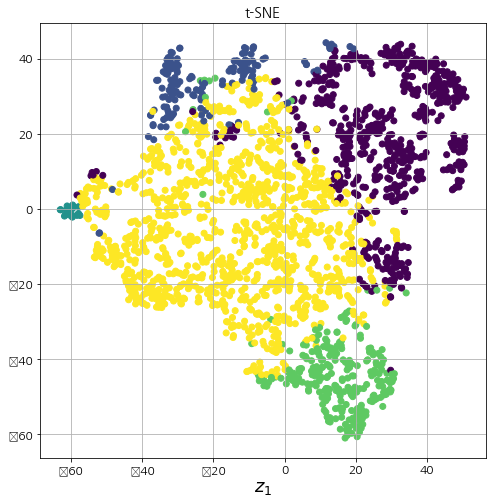

In [14]:
plt.figure(figsize=(8,8))
plt.title("t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label)
#plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label ,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

In [15]:
# 적절한 차원 수 선택
import numpy as np
pca = PCA()
pca.fit(scail_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

6

In [16]:

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(scail_data)
pca.n_components_


6

In [17]:
# 클러스터 6개 지정
k = 6
kmeans_6_6 = KMeans(n_clusters=k, random_state=42)
y_pred_6_6 = kmeans_6_6.fit_predict(scail_data)
y_pred_6_6

array([0, 5, 1, ..., 1, 1, 3])

In [23]:
label_6_6 = kmeans_6_6.labels_
x_6_6 = data_num.copy()
x_6_6["레이블"] = label_6_6
x_6_6["레이블"].value_counts()

1    972
3    464
4    323
0    274
5    131
2     19
Name: 레이블, dtype: int64

In [24]:
# csv 파일로 저장
#x_6_6.to_csv("model_dataset.csv", index=False, encoding='utf-8')
data.to_csv("model_dataset2.csv", index=False, encoding='utf-8-sig')

C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


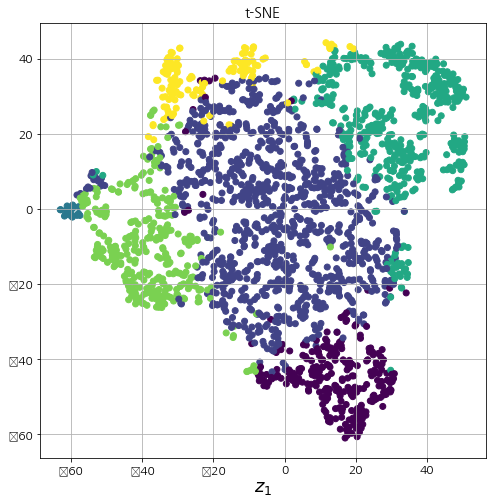

In [25]:
plt.figure(figsize=(8,8))
plt.title("t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label_6_6, label=label_6_6)
#plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label ,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.show()

In [26]:
# 6 클래스 데이터 평균
group_data=x_6_6.groupby(['레이블']).mean()
group_data

,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률
레이블,,,,,,
0,74.937956,16.795620,228112.218978,85020.569343,18.631387,64.963504
1,75.617284,38.307613,268958.356996,86420.219136,18.447531,13.640947
2,309.526316,1338.315789,361352.210526,128907.631579,6.368421,4.736842
3,35.808190,28.592672,297889.739224,72716.109914,78.898707,6.924569
4,198.613003,107.470588,237821.479876,92785.000000,8.009288,14.455108
5,84.900763,31.114504,999025.893130,266781.702290,21.954198,11.587786


In [27]:
# 원본 데이터에 레이블 추가
data["레이블"] = label_6_6
data

,업종,브랜드,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률,레이블
0,한식,국사랑,95,29,269167,52600,17,51,0
1,한식,삼육가珍,66,5,1540660,100448,0,40,5
2,한식,전준수명품청기와감자탕,56,18,619235,115000,11,0,1
3,한식,남도복국,44,13,599429,104220,69,0,3
4,한식,두찜,56,263,240278,47000,62,11,3
...,...,...,...,...,...,...,...,...,...
2178,기타 외식,포항황소곱창,27,8,327105,74800,100,0,3
2179,기타 외식,김덕후의 곱창조,86,24,779384,121050,8,4,1
2180,기타 외식,화덕고깃간,44,5,426872,182300,40,0,1
2181,기타 외식,반반한족발닭발,50,5,138981,75510,40,0,1


In [28]:
x_6_6[x_6_6['레이블'].isin(["0"])]

,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률,레이블
0,95,29,269167,52600,17,51,0
43,88,9,497049,157300,22,66,0
47,87,3,116813,101554,0,66,0
51,87,6,130794,93962,0,50,0
56,57,12,300667,89920,100,75,0
...,...,...,...,...,...,...,...
2137,66,34,226324,68000,14,50,0
2154,76,27,160786,75600,0,51,0
2159,63,12,146300,109500,8,100,0
2169,108,7,118638,56340,57,100,0


In [29]:
x_6_6[x_6_6['레이블'].isin(["1"])]

,가맹사업 개월수,가맹점수,가맹점 평균매출액,창업비용,개점률,폐점률,레이블
2,56,18,619235,115000,11,0,1
7,82,20,277692,43250,40,25,1
10,150,40,183353,77900,50,0,1
12,56,116,251514,24500,24,34,1
13,56,39,512633,125730,30,10,1
...,...,...,...,...,...,...,...
2173,48,32,611318,137550,31,6,1
2176,92,9,184087,88990,22,33,1
2179,86,24,779384,121050,8,4,1
2180,44,5,426872,182300,40,0,1


In [30]:
# 최적의 클러스터 개수 찾기

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scail_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[13097.999999999987,
 10783.316885287499,
 9093.945583412724,
 7650.364369851013,
 6415.113956520794,
 5559.319617995873,
 4986.696549574396,
 4675.240967465282,
 4368.5488210206495]

In [31]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(scail_data, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores

[0.20353661434348627,
 0.23626285055391638,
 0.25297799484808753,
 0.27236361572827567,
 0.2632914925468,
 0.26617512106601654,
 0.2680792234599796,
 0.2699148892498957]

In [32]:
data_7 = pd.read_csv("7_valid_data.csv")
data_7

,업종,브랜드,가맹사업 개월수,가맹점수,평균매출액,창업비용,개점률,폐점률,최근 2년간 매출 증가율
0,한식,국사랑,95,29,269167,52600,17.24,51.72,42.10
1,한식,삼육가珍,66,5,1540660,100448,0.00,40.00,5.59
2,한식,전준수명품청기와감자탕,56,18,619235,115000,11.11,0.00,-2.98
3,한식,두찜,56,263,240278,47000,62.74,11.03,-18.44
4,한식,쪽찌,56,30,300907,86700,53.33,10.00,-30.36
...,...,...,...,...,...,...,...,...,...
1467,기타 외식,버금새우,43,9,183365,50070,55.56,22.22,-7.39
1468,기타 외식,돈탐라제주,92,9,184087,88990,22.22,33.33,-25.43
1469,기타 외식,농장사람들,45,7,1825835,222400,14.29,14.29,-3.31
1470,기타 외식,김덕후의 곱창조,86,24,779384,121050,8.33,4.17,-16.61


In [33]:
# 수치형만 추출
data_num_7 = data_7.drop("업종", axis=1)
data_num_7 = data_num_7.drop("브랜드", axis=1)
data_num_7

,가맹사업 개월수,가맹점수,평균매출액,창업비용,개점률,폐점률,최근 2년간 매출 증가율
0,95,29,269167,52600,17.24,51.72,42.10
1,66,5,1540660,100448,0.00,40.00,5.59
2,56,18,619235,115000,11.11,0.00,-2.98
3,56,263,240278,47000,62.74,11.03,-18.44
4,56,30,300907,86700,53.33,10.00,-30.36
...,...,...,...,...,...,...,...
1467,43,9,183365,50070,55.56,22.22,-7.39
1468,92,9,184087,88990,22.22,33.33,-25.43
1469,45,7,1825835,222400,14.29,14.29,-3.31
1470,86,24,779384,121050,8.33,4.17,-16.61


In [34]:
scaler.fit(data_num_7)
scail_data_7=scaler.transform(data_num_7)
scail_data_7

array([[ 1.33029583, -0.21420252, -0.15281576, ..., -0.07624514,
         0.89778475,  0.68415028],
       [ 0.36676412, -0.3437471 ,  4.55394947, ..., -0.95569053,
         0.53352917,  0.05952492],
       [ 0.03451181, -0.27357712,  1.14305287, ..., -0.38894817,
        -0.70966396, -0.08709352],
       ...,
       [-0.33096574, -0.33295172,  5.60959961, ..., -0.22673028,
        -0.26553321, -0.09273927],
       [ 1.03126875, -0.24119098,  1.73588645, ..., -0.53076129,
        -0.58006108, -0.32028014],
       [-0.36419097, -0.3437471 ,  0.43097071, ...,  1.08478602,
        -0.70966396, -0.58563044]])

In [35]:
# 클러스터 5개 지정
k = 5
kmeans_7 = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans_7.fit_predict(scail_data_7)
y_pred

array([1, 2, 1, ..., 2, 1, 0])

In [36]:
label_7 = kmeans_7.labels_
x_7 = data_num_7.copy()
x_7["레이블"] = label_7

x_7["레이블"].value_counts()

1    547
4    481
0    342
2     97
3      5
Name: 레이블, dtype: int64

In [37]:
X_reduced_tsne_7 = tsne.fit_transform(scail_data_7)

C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


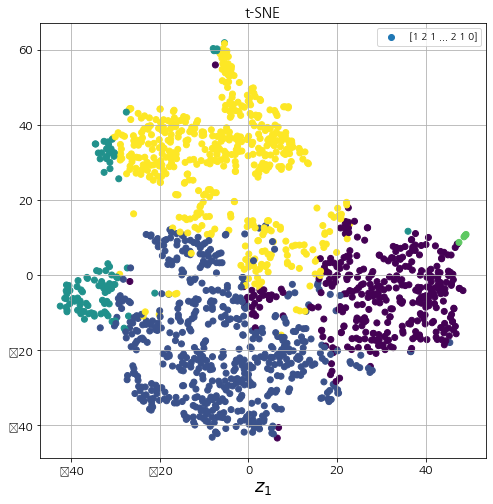

In [38]:
plt.figure(figsize=(8,8))
plt.title("t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne_7[:, 0], X_reduced_tsne_7[:, 1],c=label_7, label=label_7)
#plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label ,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [39]:
# 5클래스 데이터 평균
group_data_7=x_7.groupby(['레이블'], as_index=False).mean()
group_data_7

,레이블,가맹사업 개월수,가맹점수,평균매출액,창업비용,개점률,폐점률,최근 2년간 매출 증가율
0,0,52.403509,51.786550,275182.535088,76509.570175,47.840263,18.344883,4.208801
1,1,82.475320,40.793419,271111.616088,91703.486289,11.114497,31.551133,-3.722322
2,2,57.402062,127.154639,958213.855670,289841.371134,12.255361,15.433196,6.249072
3,3,52.200000,20.200000,245042.600000,73386.000000,27.116000,22.738000,819.844000
4,4,25.027027,101.128898,250308.374220,87419.386694,7.925281,17.604802,-2.082578


In [40]:
x_7[x_7['레이블'].isin(["3"])]

,가맹사업 개월수,가맹점수,평균매출액,창업비용,개점률,폐점률,최근 2년간 매출 증가율,레이블
107,76,8,324871,110250,0.00,62.50,1053.91,3
155,80,13,276662,72580,53.85,7.69,757.31,3
525,23,26,177807,71300,19.23,15.38,879.28,3
629,52,32,153267,25700,12.50,28.12,942.49,3
1319,30,22,292606,87100,50.00,0.00,466.23,3


In [41]:
x_7[x_7['레이블'].isin(["2"])]

,가맹사업 개월수,가맹점수,평균매출액,창업비용,개점률,폐점률,최근 2년간 매출 증가율,레이블
1,66,5,1540660,100448,0.00,40.00,5.59,2
43,72,22,881119,176000,27.27,4.55,-2.35,2
70,77,10,626400,445000,30.00,0.00,69.87,2
72,81,15,915090,160100,13.33,0.00,-6.56,2
115,52,18,876741,137000,27.78,11.11,27.58,2
...,...,...,...,...,...,...,...,...
1423,77,18,1038195,144315,0.00,22.22,11.46,2
1443,21,5,1016992,112329,0.00,60.00,25.40,2
1446,33,9,1446589,235250,55.56,0.00,22.64,2
1451,108,9,1075136,329150,33.33,22.22,25.67,2


In [42]:
# 클러스터 6개 지정
k = 6
kmeans_7_6 = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans_7_6.fit_predict(scail_data_7)
y_pred

array([2, 1, 0, ..., 1, 2, 4])

In [43]:
label_7_6 = kmeans_7_6.labels_
x_7_6 = data_num_7.copy()
x_7_6["레이블"] = label_7_6

x_7_6["레이블"].value_counts()

2    538
0    483
4    337
1     89
3     20
5      5
Name: 레이블, dtype: int64

C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yangsemo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


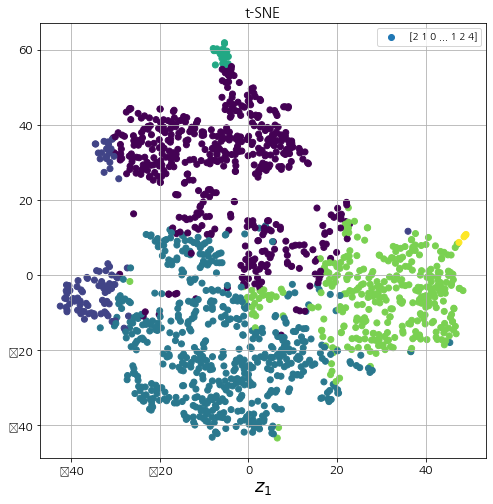

In [44]:
plt.figure(figsize=(8,8))
plt.title("t-SNE", fontsize=14)
plt.scatter(X_reduced_tsne_7[:, 0], X_reduced_tsne_7[:, 1],c=label_7_6, label=label_7_6)
#plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],c=label ,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.legend()
plt.show()